In [1]:
import pandas as pd
pd. set_option("display.max_columns", None)
pd.set_option('max_colwidth', None)

from sklearn.model_selection import train_test_split
from category_encoders.leave_one_out import LeaveOneOutEncoder

In [2]:
df_dict = pd.read_csv("Data Dictionary.csv")

In [3]:
df = pd.read_csv("Dataset.csv")

In [4]:
df

encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             66154       25312          118               0  68.0  22.730000   
1            114252       59342           81               0  77.0  27.420000   
2            119783       50777          118               0  25.0  31.950000   
3             79267       46918          118               0  81.0  22.640000   
4             92056       34377           33               0  19.0        NaN   
...             ...         ...          ...             ...   ...        ...   
91708         91592       78108           30               0  75.0  23.060250   
91709         66119       13486          121               0  56.0  47.179671   
91710          8981       58179          195               0  48.0  27.236914   
91711         33776      120598           66               0   NaN  23.297481   
91712          1671       53612          104               0  82.0  22.031250   

       elective_surgery  ethnicity gender  height hospital_admit_source  \
0                     0  Caucasian      M   180.3                 Floor   
1                     0  Caucasian      F   160.0                 Floor   
2                     0  Caucasian      F   172.7  Emergency Department   
3                     1  Caucasian      F   165.1        Operating Room   
4                     0  Caucasian      M   188.0                   NaN   
...                 ...        ...    ...     ...                   ...   
91708                 0  Caucasian      M   177.8      Acute Care/Floor   
91709                 0  Caucasian      F   183.0  Emergency Department   
91710                 0  Caucasian      M   170.2  Emergency Department   
91711                 0  Caucasian      F   154.9  Emergency Department   
91712                 1  Caucasian      F   160.0                   NaN   

                icu_admit_source  icu_id icu_stay_type      icu_type  \
0                          Floor      92         admit         CTICU   
1                          Floor      90         admit  Med-Surg ICU   
2           Accident & Emergency      93         admit  Med-Surg ICU   
3      Operating Room / Recovery      92         admit         CTICU   
4           Accident & Emergency      91         admit  Med-Surg ICU   
...                          ...     ...           ...           ...   
91708                      Floor     927         admit   Cardiac ICU   
91709                      Floor     925         admit  Med-Surg ICU   
91710       Accident & Emergency     908         admit  Med-Surg ICU   
91711       Accident & Emergency     922         admit  Med-Surg ICU   
91712  Operating Room / Recovery     926         admit  Med-Surg ICU   

       pre_icu_los_days  readmission_status  weight  albumin_apache  \
0              0.541667                   0    73.9             2.3   
1              0.927778                   0    70.2             NaN   
2              0.000694                   0    95.3             NaN   
3              0.000694                   0    61.7             NaN   
4              0.073611                   0     NaN             NaN   
...                 ...                 ...     ...             ...   
91708          0.298611                   0    72.9             NaN   
91709          0.120139                   0   158.0             NaN   
91710          0.046528                   0    78.9             2.9   
91711          0.081944                   0    55.9             NaN   
91712          0.018056                   0    56.4             2.2   

       apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
0                   113.0               502.01                      0   
1                   108.0               203.01                      0   
2                   122.0               703.03                      0   
3                   203.0              1206.03                      1   
4                   119.0               601.01    

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_dict)

Category                  Variable Name  \
0                   identifier                   encounter_id   
1                   identifier                    hospital_id   
2                   identifier                     patient_id   
3                  demographic                 hospital_death   
4                  demographic                            age   
5                  demographic                            bmi   
6                  demographic               elective_surgery   
7                  demographic                      ethnicity   
8                  demographic                         gender   
9                  demographic                         height   
10                 demographic          hospital_admit_source   
11                 demographic               icu_admit_source   
12                 demographic                 icu_admit_type   
13                 demographic                         icu_id   
14                 demographic                  icu_stay_type   
15                 demographic                       icu_type   
16                 demographic               pre_icu_los_days   
17                 demographic             readmission_status   
18                 demographic                         weight   
19            APACHE covariate                 albumin_apache   
20            APACHE covariate             apache_2_diagnosis   
21            APACHE covariate            apache_3j_diagnosis   
22            APACHE covariate          apache_post_operative   
23            APACHE covariate                     arf_apache   
24            APACHE covariate               bilirubin_apache   
25            APACHE covariate                     bun_apache   
26            APACHE covariate              creatinine_apache   
27            APACHE covariate                    fio2_apache   
28            APACHE covariate                gcs_eyes_apache   
29            APACHE covariate               gcs_motor_apache   
30            APACHE covariate              gcs_unable_apache   
31            APACHE covariate              gcs_verbal_apache   
32            APACHE covariate                 glucose_apache   
33            APACHE covariate              heart_rate_apache   
34            APACHE covariate              hematocrit_apache   
35            APACHE covariate               intubated_apache   
36            APACHE covariate                     map_apache   
37            APACHE covariate                   paco2_apache   
38            APACHE covariate            paco2_for_ph_apache   
39            APACHE covariate                    pao2_apache   
40            APACHE covariate                      ph_apache   
41            APACHE covariate                resprate_apache   
42            APACHE covariate                  sodium_apache   
43            APACHE covariate                    temp_apache   
44            APACHE covariate             urineoutput_apache   
45            APACHE covariate              ventilated_apache   
46            APACHE covariate                     wbc_apache   
47                      vitals         d1_diasbp_invasive_max   
48                      vitals         d1_diasbp_invasive_min   
49                      vitals                  d1_diasbp_max   
50                      vitals                  d1_diasbp_min   
51                      vitals      d1_diasbp_noninvasive_max   
52                      vitals      d1_diasbp_noninvasive_min   
53                      vitals               d1_heartrate_max   
54                      vitals               d1_heartrate_min   
55                      vitals            d1_mbp_invasive_max   
56                      vitals            d1_mbp_invasive_min   
57                      vitals                     d1_mbp_max   
58                      vitals                     d1_mbp_min   
59                      vitals         d1_mbp_noninvasive_max   
60                      vitals         d1_mbp_noninvasive

# Preprocessing

In [6]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns=['Count', 'Missing%', 'Unique', 'Dtype', 'Numeric','Mode', 'Mean', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), round((df[col].isnull().sum()*100)/(df.shape[0]),2), df[col].nunique(),
                                  df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mode().values[0], df[col].mean(), df[col].min(),
                                  df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), 
                                  df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(), round((df[col].isnull().sum()*100)/(df.shape[0]),2), df[col].nunique(),
                                  df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mode().values[0], '-', '-', 
                                  '-', '-', '-',
                                  '-', '-', '-', '-']
            
    return output_df.sort_values(by = ['Numeric', 'Skew', 'Unique'], ascending = False)

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(unistats(df))

Count  Missing%  Unique    Dtype  Numeric  \
aids                           90998      0.78       2  float64     True   
lymphoma                       90998      0.78       2  float64     True   
leukemia                       90998      0.78       2  float64     True   
pre_icu_los_days               91713      0.00    9757  float64     True   
gcs_unable_apache              90676      1.13       2  float64     True   
h1_bilirubin_min                7094     92.27     181  float64     True   
h1_bilirubin_max                7094     92.27     181  float64     True   
d1_bilirubin_min               38040     58.52     357  float64     True   
d1_bilirubin_max               38040     58.52     374  float64     True   
bilirubin_apache               33579     63.39     362  float64     True   
hepatic_failure                90998      0.78       2  float64     True   
cirrhosis                      90998      0.78       2  float64     True   
solid_tumor_with_metastasis    90998      0.78       2  float64     True   
immunosuppression              90998      0.78       2  float64     True   
arf_apache                     90998      0.78       2  float64     True   
h1_creatinine_min              16756     81.73     777  float64     True   
h1_creatinine_max              16756     81.73     784  float64     True   
d1_creatinine_min              81544     11.09    1093  float64     True   
d1_inr_max                     33772     63.18     481  float64     True   
h1_inr_max                     33772     63.18     481  float64     True   
d1_creatinine_max              81544     11.09    1187  float64     True   
d1_lactate_min                 23317     74.58     486  float64     True   
creatinine_apache              72860     20.56    1127  float64     True   
d1_inr_min                     33772     63.18     393  float64     True   
h1_inr_min                     33772     63.18     393  float64     True   
h1_mbp_invasive_max            16869     81.61     247  float64     True   
hospital_death                 91713      0.00       2    int64     True   
d1_lactate_max                 23317     74.58     704  float64     True   
d1_arterial_po2_min            32451     64.62    1822  float64     True   
h1_lactate_min                  7344     91.99     536  float64     True   
h1_glucose_min                 39099     57.37     588  float64     True   
d1_resprate_max                91328      0.42      79  float64     True   
h1_glucose_max                 39099     57.37     601  float64     True   
h1_lactate_max                  7344     91.99     547  float64     True   
d1_mbp_invasive_max            23936     73.90     285  float64     True   
h1_bun_min                     16622     81.88     258  float64     True   
h1_bun_max                     16622     81.88     258  float64     True   
d1_bun_max                     81199     11.46     495  float64     True   
bun_apache                     72451     21.00     476  float64     True   
d1_bun_min                     81199     11.46     472  float64     True   
d1_glucose_max                 85906      6.33     538  float64     True   
pao2_apache                    20845     77.27    2003  float64     True   
intubated_apache               90998      0.78       2  float64     True   
h1_resprate_min                87356      4.75      91  float64     True   
glucose_apache                 80677     12.03     565  float64     True   
urineoutput_apache             42715     53.43   24772  float64     True   
d1_wbc_max                     78539     14.36    3098  float64     True   
d1_wbc_min                     78539     14.36    2774  float64     True   
wbc_apache                     69701     24.00    3075  float64     True   
h1_arterial_po2_min            15768     82.81    1729  float64     True   
elective_surgery               91713      0.00       2    int64     True   
d1_diasbp_invasive_max         23729     74.13     145  float64     True   
h1_

In [8]:
null_percentages = df.isnull().sum() / len(df) * 100

# Count the columns with more than 70% null values
count_columns_with_nulls = (null_percentages > 70).sum()

print(f"The count of columns with more than 70% null values is: {count_columns_with_nulls}")

The count of columns with more than 70% null values is: 55


In [9]:
df[['hospital_death']].value_counts()

hospital_death
0                 83798
1                  7915
dtype: int64

In [10]:
df_dead = df[df['hospital_death'] == 1]

In [11]:
df_dead

encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
8             80471       10577          118               1  45.0        NaN   
25            29208      114628          118               1  68.0  26.010703   
46            40903       55564          118               1  64.0  16.980389   
58            80233       83826           81               1  55.0        NaN   
73            75834       43161          118               1  74.0  25.311715   
...             ...         ...          ...             ...   ...        ...   
91602         69810       89181           30               1  19.0  20.308204   
91611         95137      103841           30               1  74.0  32.622159   
91620        129975       40159          195               1   NaN  21.067554   
91691         96280       27717          184               1  59.0  29.384757   
91696         18985       20726           30               1  65.0        NaN   

       elective_surgery  ethnicity gender  height hospital_admit_source  \
8                     0  Caucasian      M   170.2        Other Hospital   
25                    0  Caucasian      F   165.1                   NaN   
46                    0  Caucasian      M   180.3        Operating Room   
58                    0  Caucasian      F   172.7  Emergency Department   
73                    0  Caucasian      M   167.6          Direct Admit   
...                 ...        ...    ...     ...                   ...   
91602                 0  Caucasian      M   177.8                   NaN   
91611                 0  Caucasian      M   170.2                 Floor   
91620                 0  Caucasian      M   162.6                 Floor   
91691                 0  Caucasian      F   165.0  Emergency Department   
91696                 0  Caucasian      M     NaN          Direct Admit   

                icu_admit_source  icu_id icu_stay_type      icu_type  \
8                 Other Hospital     114         admit     CCU-CTICU   
25                         Floor     114         admit     CCU-CTICU   
46     Operating Room / Recovery     102         admit     Neuro ICU   
58          Accident & Emergency      90         admit  Med-Surg ICU   
73          Accident & Emergency      97         admit          MICU   
...                          ...     ...           ...           ...   
91602             Other Hospital     927         admit   Cardiac ICU   
91611                      Floor     927         admit   Cardiac ICU   
91620                      Floor     908         admit  Med-Surg ICU   
91691       Accident & Emergency     907         admit  Med-Surg ICU   
91696       Accident & Emergency     927         admit   Cardiac ICU   

       pre_icu_los_days  readmission_status  weight  albumin_apache  \
8              0.009028                   0     NaN             2.7   
25             0.758333                   0    70.9             1.2   
46             2.817361                   0    55.2             NaN   
58             0.013194                   0     NaN             2.3   
73            15.123611                   0    71.1             2.8   
...                 ...                 ...     ...             ...   
91602          0.002083                   0    64.2             3.1   
91611          3.293750                   0    94.5             2.4   
91620          0.218056                   0    55.7             NaN   
91691          0.024306                   0    80.0             NaN   
91696          0.069444                   0    95.2             2.4   

       apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
8                   116.0               103.01                      0   
25                  113.0               501.06                      0   
46                  217.0              1502.02                      1   
58                  105.0               207.01                      0   
73                  306.0               802.04    

In [12]:
null_percentages = df_dead.isnull().sum() / len(df_dead) * 100

# Count the columns with more than 70% null values
count_columns_with_nulls = (null_percentages > 70).sum()

print(f"The count of columns with more than 70% null values is: {count_columns_with_nulls}")

The count of columns with more than 70% null values is: 40


In [13]:
df1 = df.drop(null_percentages[null_percentages > 70].index,axis=1)

In [14]:
df1 = df1.reset_index(drop=True)
df1

encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             66154       25312          118               0  68.0  22.730000   
1            114252       59342           81               0  77.0  27.420000   
2            119783       50777          118               0  25.0  31.950000   
3             79267       46918          118               0  81.0  22.640000   
4             92056       34377           33               0  19.0        NaN   
...             ...         ...          ...             ...   ...        ...   
91708         91592       78108           30               0  75.0  23.060250   
91709         66119       13486          121               0  56.0  47.179671   
91710          8981       58179          195               0  48.0  27.236914   
91711         33776      120598           66               0   NaN  23.297481   
91712          1671       53612          104               0  82.0  22.031250   

       elective_surgery  ethnicity gender  height hospital_admit_source  \
0                     0  Caucasian      M   180.3                 Floor   
1                     0  Caucasian      F   160.0                 Floor   
2                     0  Caucasian      F   172.7  Emergency Department   
3                     1  Caucasian      F   165.1        Operating Room   
4                     0  Caucasian      M   188.0                   NaN   
...                 ...        ...    ...     ...                   ...   
91708                 0  Caucasian      M   177.8      Acute Care/Floor   
91709                 0  Caucasian      F   183.0  Emergency Department   
91710                 0  Caucasian      M   170.2  Emergency Department   
91711                 0  Caucasian      F   154.9  Emergency Department   
91712                 1  Caucasian      F   160.0                   NaN   

                icu_admit_source  icu_id icu_stay_type      icu_type  \
0                          Floor      92         admit         CTICU   
1                          Floor      90         admit  Med-Surg ICU   
2           Accident & Emergency      93         admit  Med-Surg ICU   
3      Operating Room / Recovery      92         admit         CTICU   
4           Accident & Emergency      91         admit  Med-Surg ICU   
...                          ...     ...           ...           ...   
91708                      Floor     927         admit   Cardiac ICU   
91709                      Floor     925         admit  Med-Surg ICU   
91710       Accident & Emergency     908         admit  Med-Surg ICU   
91711       Accident & Emergency     922         admit  Med-Surg ICU   
91712  Operating Room / Recovery     926         admit  Med-Surg ICU   

       pre_icu_los_days  readmission_status  weight  albumin_apache  \
0              0.541667                   0    73.9             2.3   
1              0.927778                   0    70.2             NaN   
2              0.000694                   0    95.3             NaN   
3              0.000694                   0    61.7             NaN   
4              0.073611                   0     NaN             NaN   
...                 ...                 ...     ...             ...   
91708          0.298611                   0    72.9             NaN   
91709          0.120139                   0   158.0             NaN   
91710          0.046528                   0    78.9             2.9   
91711          0.081944                   0    55.9             NaN   
91712          0.018056                   0    56.4             2.2   

       apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
0                   113.0               502.01                      0   
1                   108.0               203.01                      0   
2                   122.0               703.03                      0   
3                   203.0              1206.03                      1   
4                   119.0               601.01    

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

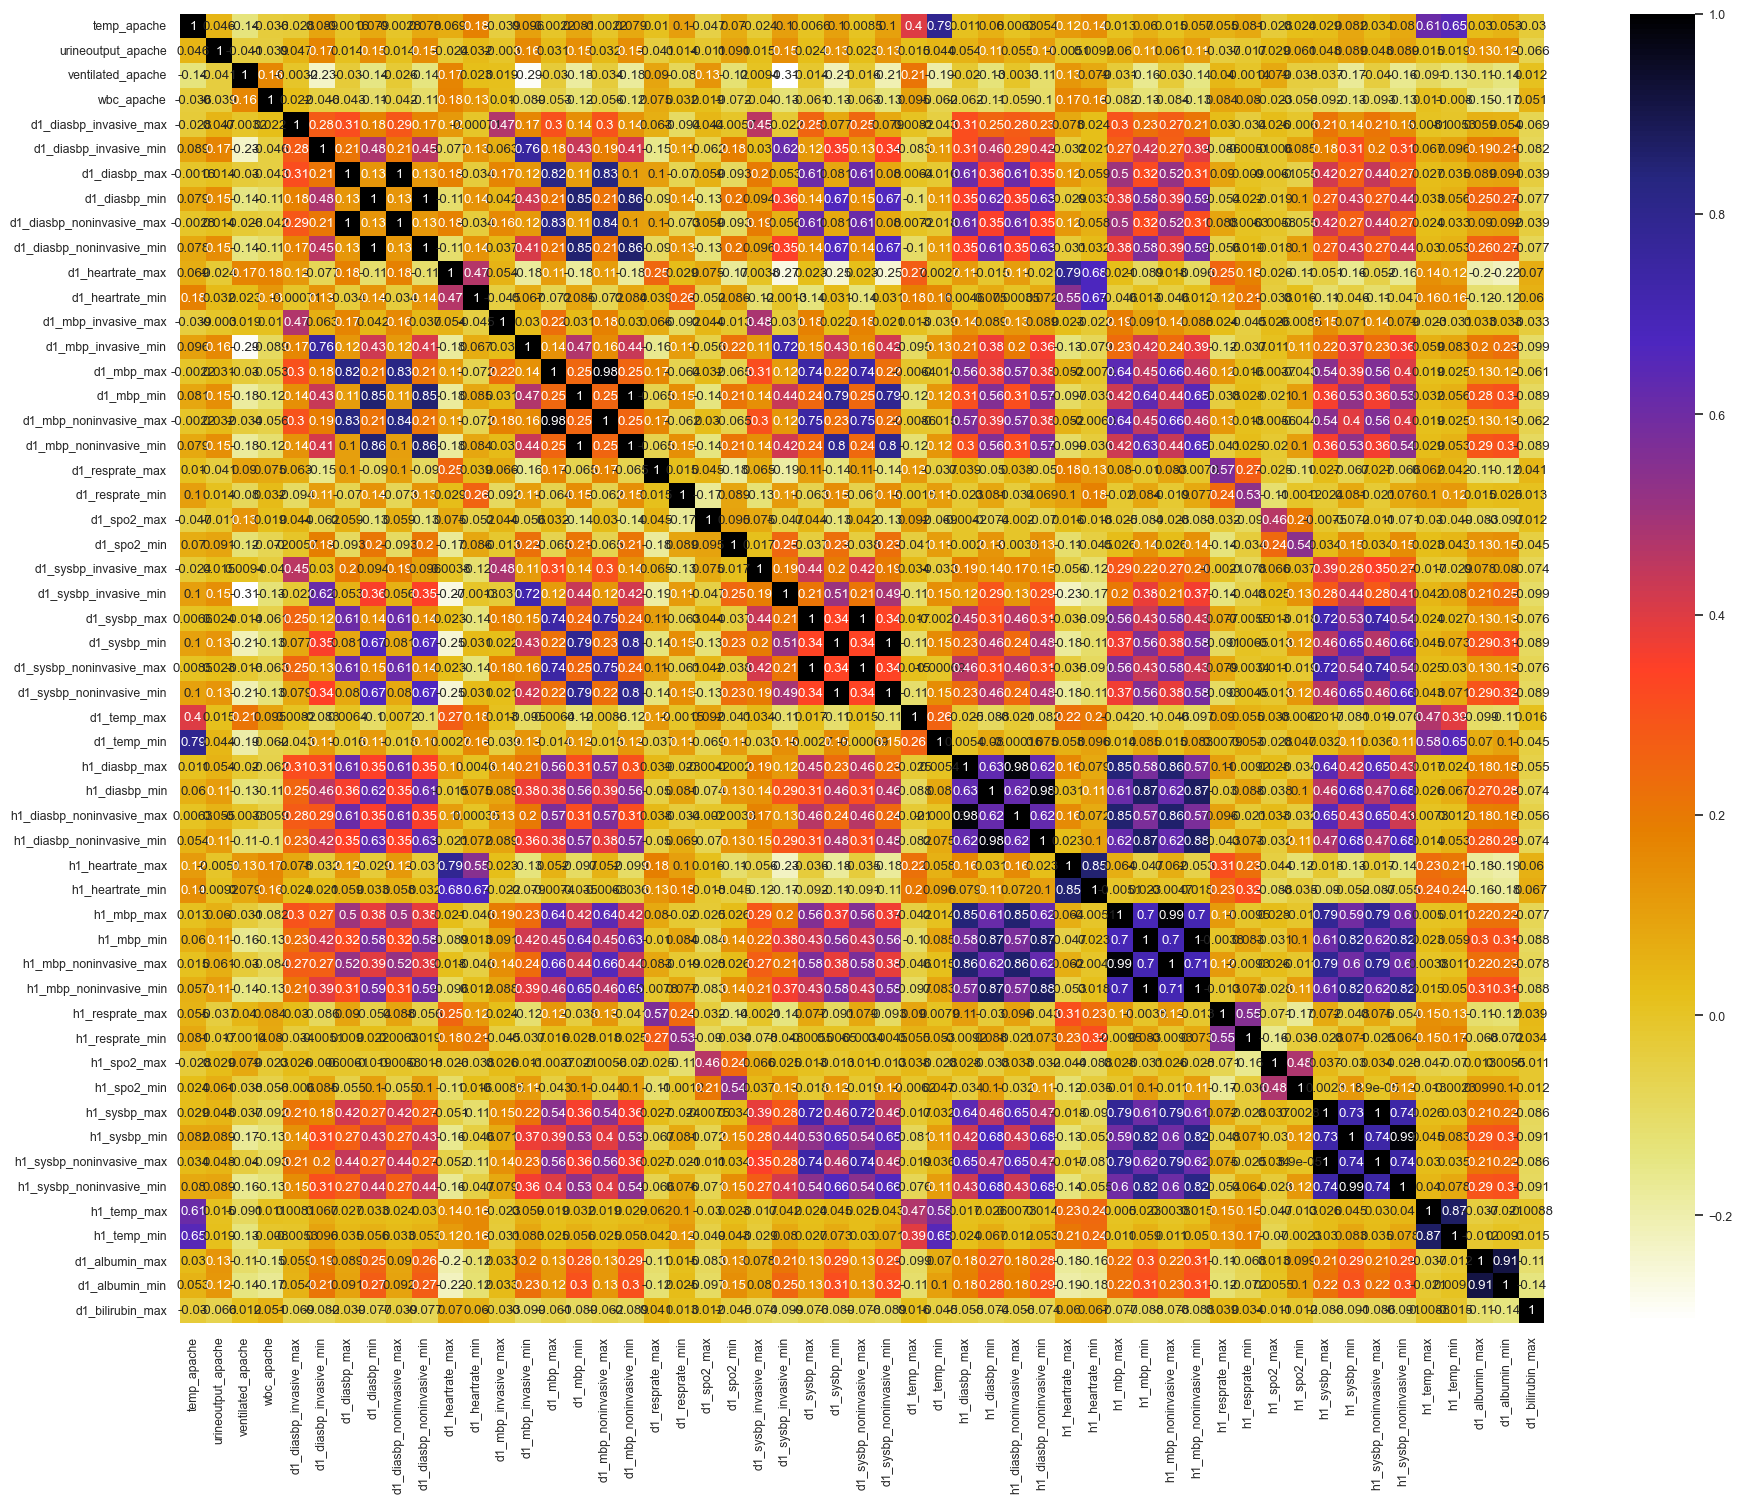

In [16]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df1.iloc[:,42:95].corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [17]:
X = df1.drop(['hospital_death'],axis=1)
y = df1[['hospital_death']]

In [18]:
X1 = X

In [19]:
for i in X1.select_dtypes(exclude='object'):
    X1[i] = X1[i].astype('float')

In [20]:
import numpy as np

In [21]:
correlation_matrix = X1.corr(numeric_only=True).abs()

# Set a correlation threshold
correlation_threshold = 0.9

# Find highly correlated feature pairs
highly_correlated_features = np.where(correlation_matrix >= correlation_threshold)

# Create a set to store the features to be removed
features_to_remove = set()

# Iterate through the correlated feature pairs and add one of the features to the set
for i, j in zip(*highly_correlated_features):
    if i != j and i not in features_to_remove and j not in features_to_remove:
        features_to_remove.add(j)

print(features_to_remove)

{14, 30, 43, 44, 51, 52, 61, 62, 67, 68, 73, 74, 81, 82, 85, 86, 87, 88, 89, 90, 93, 94, 95, 100, 101, 102, 108, 112, 113, 114, 116, 117, 118}


In [22]:
df3 = X1.drop(list(X1.iloc[:,list(features_to_remove)].columns),axis=1)

<Axes: >

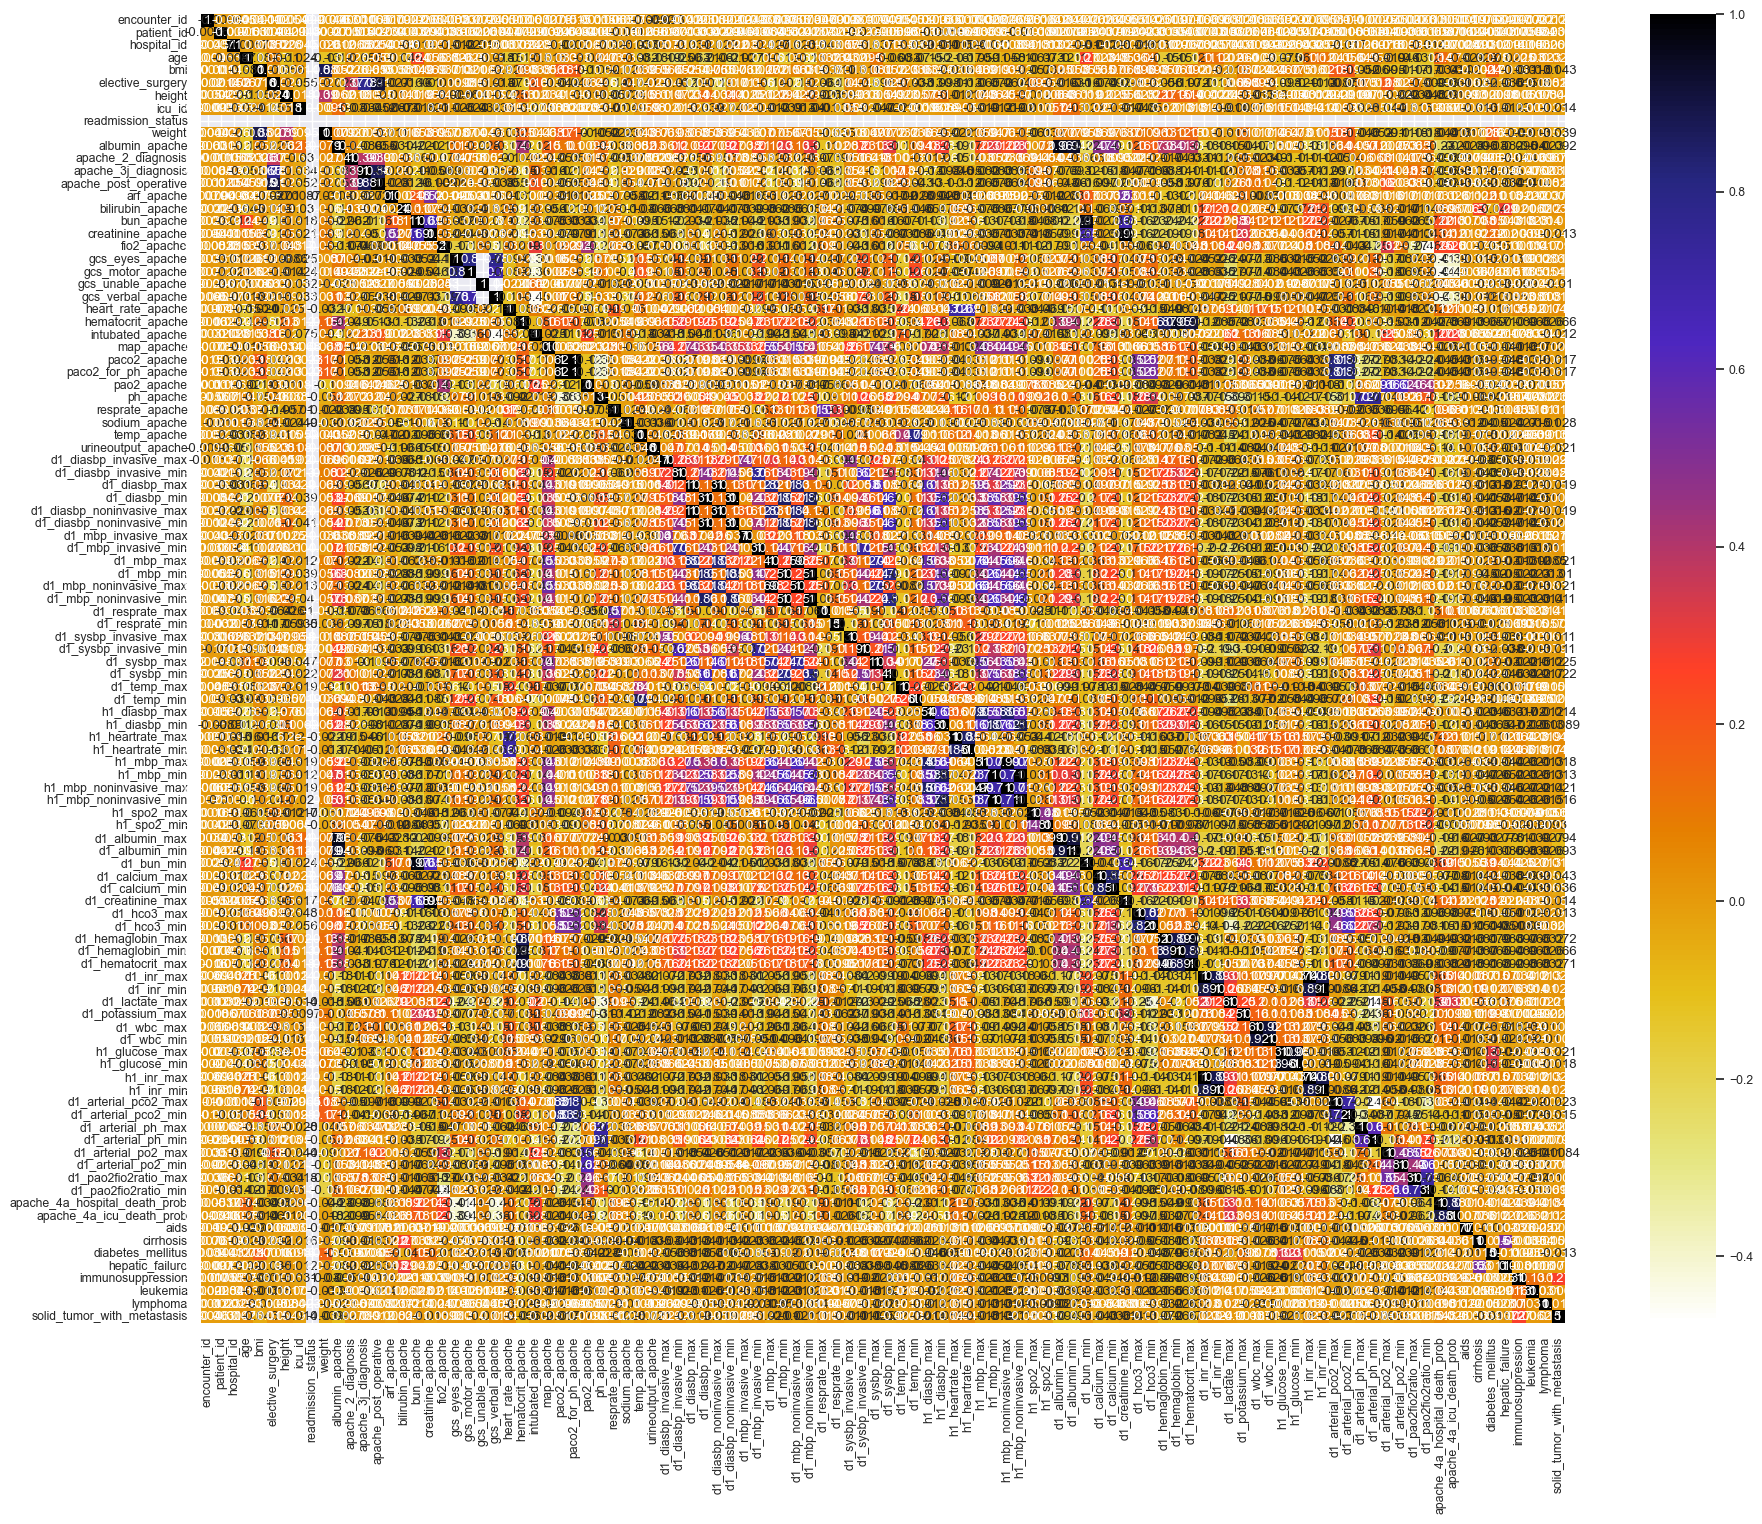

In [23]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df3.corr(numeric_only=True), annot=True, cmap=plt.cm.CMRmap_r)

In [35]:
variances = df3.var(numeric_only=True)
threshold = 0.005
low_variance_columns = variances[variances < threshold].index

In [38]:
df4 = df3.drop(list(low_variance_columns),axis=1)

In [39]:
df4

encounter_id  patient_id  hospital_id   age        bmi  \
0           66154.0     25312.0        118.0  68.0  22.730000   
1          114252.0     59342.0         81.0  77.0  27.420000   
2          119783.0     50777.0        118.0  25.0  31.950000   
3           79267.0     46918.0        118.0  81.0  22.640000   
4           92056.0     34377.0         33.0  19.0        NaN   
...             ...         ...          ...   ...        ...   
91708       91592.0     78108.0         30.0  75.0  23.060250   
91709       66119.0     13486.0        121.0  56.0  47.179671   
91710        8981.0     58179.0        195.0  48.0  27.236914   
91711       33776.0    120598.0         66.0   NaN  23.297481   
91712        1671.0     53612.0        104.0  82.0  22.031250   

       elective_surgery  ethnicity gender  height hospital_admit_source  \
0                   0.0  Caucasian      M   180.3                 Floor   
1                   0.0  Caucasian      F   160.0                 Floor   
2                   0.0  Caucasian      F   172.7  Emergency Department   
3                   1.0  Caucasian      F   165.1        Operating Room   
4                   0.0  Caucasian      M   188.0                   NaN   
...                 ...        ...    ...     ...                   ...   
91708               0.0  Caucasian      M   177.8      Acute Care/Floor   
91709               0.0  Caucasian      F   183.0  Emergency Department   
91710               0.0  Caucasian      M   170.2  Emergency Department   
91711               0.0  Caucasian      F   154.9  Emergency Department   
91712               1.0  Caucasian      F   160.0                   NaN   

                icu_admit_source  icu_id icu_stay_type      icu_type  weight  \
0                          Floor    92.0         admit         CTICU    73.9   
1                          Floor    90.0         admit  Med-Surg ICU    70.2   
2           Accident & Emergency    93.0         admit  Med-Surg ICU    95.3   
3      Operating Room / Recovery    92.0         admit         CTICU    61.7   
4           Accident & Emergency    91.0         admit  Med-Surg ICU     NaN   
...                          ...     ...           ...           ...     ...   
91708                      Floor   927.0         admit   Cardiac ICU    72.9   
91709                      Floor   925.0         admit  Med-Surg ICU   158.0   
91710       Accident & Emergency   908.0         admit  Med-Surg ICU    78.9   
91711       Accident & Emergency   922.0         admit  Med-Surg ICU    55.9   
91712  Operating Room / Recovery   926.0         admit  Med-Surg ICU    56.4   

       albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
0                 2.3               113.0               502.01   
1                 NaN               108.0               203.01   
2                 NaN               122.0               703.03   
3                 NaN               203.0              1206.03   
4                 NaN               119.0               601.01   
...               ...                 ...                  ...   
91708             NaN               113.0               501.06   
91709             NaN               113.0               501.05   
91710             2.9               123.0               702.01   
91711             NaN               108.0               203.01   
91712             2.2               304.0              1409.02   

       apache_post_operative  arf_apache  bilirubin_apache  bun_apache  \
0                        0.0         0.0               0.4        31.0   
1                        0.0         0.0               NaN         9.0   
2                        0.0         0.0               NaN         NaN   
3                        1.0         0.0               NaN         NaN   
4                        0.0         0.0               NaN         NaN   
...                      ...         ...               ...         ...   
91708                    0.0         0.0             

In [40]:
# Dealing with high id data

In [41]:
df6 = unistats(df4)

In [42]:
df6[df6['Unique']>50000]

Count  Missing%  Unique    Dtype  Numeric Mode          Mean  \
patient_id    91713       0.0   91713  float64     True  1.0  65537.131464   
encounter_id  91713       0.0   91713  float64     True  1.0   65606.07928   

              Min      25%   Median      75%       Max           Std  \
patient_id    1.0  32830.0  65413.0  98298.0  131051.0  37811.252183   
encounter_id  1.0  32852.0  65665.0  98342.0  131051.0  37795.088538   

                  Skew      Kurt  
patient_id    0.000777 -1.198444  
encounter_id -0.002258 -1.197933

In [43]:
df7 = df4.drop(['patient_id','encounter_id'],axis=1)

In [44]:
df8 = unistats(df7)

In [45]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df8)

Count  Missing%  Unique    Dtype  Numeric  \
leukemia                       90998      0.78       2  float64     True   
gcs_unable_apache              90676      1.13       2  float64     True   
bilirubin_apache               33579     63.39     362  float64     True   
hepatic_failure                90998      0.78       2  float64     True   
cirrhosis                      90998      0.78       2  float64     True   
solid_tumor_with_metastasis    90998      0.78       2  float64     True   
immunosuppression              90998      0.78       2  float64     True   
arf_apache                     90998      0.78       2  float64     True   
d1_inr_max                     33772     63.18     481  float64     True   
h1_inr_max                     33772     63.18     481  float64     True   
d1_creatinine_max              81544     11.09    1187  float64     True   
creatinine_apache              72860     20.56    1127  float64     True   
d1_inr_min                     33772     63.18     393  float64     True   
h1_inr_min                     33772     63.18     393  float64     True   
d1_lactate_max                 23317     74.58     704  float64     True   
d1_arterial_po2_min            32451     64.62    1822  float64     True   
h1_glucose_min                 39099     57.37     588  float64     True   
d1_resprate_max                91328      0.42      79  float64     True   
h1_glucose_max                 39099     57.37     601  float64     True   
d1_mbp_invasive_max            23936     73.90     285  float64     True   
bun_apache                     72451     21.00     476  float64     True   
d1_bun_min                     81199     11.46     472  float64     True   
pao2_apache                    20845     77.27    2003  float64     True   
intubated_apache               90998      0.78       2  float64     True   
urineoutput_apache             42715     53.43   24772  float64     True   
d1_wbc_max                     78539     14.36    3098  float64     True   
d1_wbc_min                     78539     14.36    2774  float64     True   
elective_surgery               91713      0.00       2  float64     True   
d1_diasbp_invasive_max         23729     74.13     145  float64     True   
d1_arterial_pco2_max           32442     64.63     831  float64     True   
apache_post_operative          91713      0.00       2  float64     True   
d1_arterial_po2_max            32451     64.62    2428  float64     True   
bmi                            88284      3.74   34888  float64     True   
paco2_apache                   20845     77.27     704  float64     True   
paco2_for_ph_apache            20845     77.27     704  float64     True   
diabetes_mellitus              90998      0.78       2  float64     True   
d1_arterial_pco2_min           32442     64.63     674  float64     True   
d1_sysbp_invasive_max          23754     74.10     225  float64     True   
weight                         88993      2.97    3409  float64     True   
d1_potassium_max               82128     10.45     100  float64     True   
apache_3j_diagnosis            90612      1.20     399  float64     True   
d1_temp_max                    89389      2.53     186  float64     True   
d1_diasbp_max                  91548      0.18     120  float64     True   
d1_diasbp_noninvasive_max      90673      1.13     120  float64     True   
d1_mbp_max                     91493      0.24     125  float64     True   
d1_pao2fio2ratio_max           25705     71.97    5194  float64     True   
d1_mbp_noninvasive_max         90234      1.61     122  float64     True   
map_apache                     90719      1.08     161  float64     True   
h1_diasbp_max                  88094      3.95     107  float64     True   
d1_pao2fio2ratio_min           25705     71.97    4990  float64     True   
h1_mbp_max                     87074      5.06     117  float64     True   
h1_mbp_noninvasive_max         82629      9.90     115  float64     True   
h1_

In [74]:
# Train - Test
X_train, X_test, y_train, y_test = train_test_split(df7, y['hospital_death'], test_size=0.2, stratify=y, random_state=69)# Split train into train-val

In [75]:
LOOE_encoder = LeaveOneOutEncoder()
train_looe = LOOE_encoder.fit_transform(X_train.select_dtypes(include='object'), y_train)
train_looe_test = LOOE_encoder.transform(X_test.select_dtypes(include='object'))

In [76]:
X_train[list(X_train.select_dtypes(include='object').columns)] = train_looe
X_test[list(X_test.select_dtypes(include='object').columns)] = train_looe_test

In [77]:
from statsmodels.imputation import mice

In [78]:
# variables_with_missing = df7[list(df7[df7.select_dtypes(exclude='object').isnull().any().index].columns)]
variables_with_missing = X_train[list(X_train[X_train.isnull().any().index].columns)]
variables_with_missing

hospital_id   age        bmi  elective_surgery  ethnicity    gender  \
64262         19.0  73.0  33.436735               0.0   0.087041  0.084483   
1913          81.0   NaN  23.518519               0.0   0.087059  0.084508   
26373        136.0  52.0  32.874197               0.0   0.087059  0.088263   
58106         80.0  80.0  27.317449               0.0   0.087059  0.084508   
61715         19.0  36.0  26.850321               0.0   0.097625  0.084508   
...            ...   ...        ...               ...        ...       ...   
45819         21.0  87.0  35.133404               0.0   0.087059  0.088263   
21872        112.0  75.0  28.912742               0.0   0.087059  0.088263   
58521         39.0  55.0  38.358517               0.0   0.087059  0.088263   
53582         27.0  43.0  35.529584               1.0   0.087059  0.084508   
31020         79.0  53.0  23.542857               0.0   0.081855  0.084508   

       height  hospital_admit_source  icu_admit_source  icu_id  icu_stay_type  \
64262   175.0               0.086391          0.086349   653.0       0.084942   
1913    180.0               0.138018          0.134510    90.0       0.084956   
26373   165.0               0.086425          0.086372   374.0       0.084956   
58106   176.5               0.185510          0.134510   620.0       0.084956   
61715   165.0               0.086425          0.086372   646.0       0.084956   
...       ...                    ...               ...     ...            ...   
45819   152.4               0.086425          0.086372   513.0       0.084956   
21872   152.0               0.086425          0.086372   347.0       0.084956   
58521   161.3               0.086425          0.086372   619.0       0.084956   
53582   185.0               0.035653          0.037126   608.0       0.084956   
31020   175.0               0.138018          0.134510   337.0       0.084956   

       icu_type  weight  albumin_apache  apache_2_diagnosis  \
64262  0.087989   102.4             NaN               103.0   
1913   0.088014    76.2             NaN               113.0   
26373  0.088014    89.5             NaN               120.0   
58106  0.088014    85.1             3.1               113.0   
61715  0.086715    73.1             NaN               121.0   
...         ...     ...             ...                 ...   
45819  0.118694    81.6             2.6               123.0   
21872  0.118694    66.8             3.3               113.0   
58521  0.076345    99.8             NaN               113.0   
53582  0.088014   121.6             2.5               304.0   
31020  0.088014    72.1             2.0               113.0   

       apache_3j_diagnosis  apache_post_operative  arf_apache  \
64262               204.01                    0.0         0.0   
1913                501.05                    0.0         0.0   
26373               407.01                    0.0         0.0   
58106               502.01                    0.0         0.0   
61715               401.01                    0.0         0.0   
...                    ...                    ...         ...   
45819               702.01                    0.0         0.0   
21872               501.05                    0.0         0.0   
58521               501.06                    0.0         0.0   
53582              1408.03                    1.0         0.0   
31020               501.02                    0.0         0.0   

       bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
64262               NaN        20.0               1.41          NaN   
1913                NaN        51.0               2.80          NaN   
26373               NaN         NaN                NaN          NaN   
58106               0.6       105.0               4.21          NaN   
61715               NaN         5.0               0.67          NaN   
...                 ...         ...                ...          ...   
45819               NaN        23.0               0.86        

In [79]:
# Perform MICE imputation
imputer = mice.MICEData(variables_with_missing)
X_train1 = imputer.data

In [80]:
# variables_with_missing = df7[list(df7[df7.select_dtypes(exclude='object').isnull().any().index].columns)]
variables_with_missing = X_test[list(X_test[X_test.isnull().any().index].columns)]
variables_with_missing

hospital_id   age        bmi  elective_surgery  ethnicity    gender  \
85858        146.0  74.0  29.387125               1.0   0.087057  0.088261   
17542        105.0   NaN  25.664062               0.0   0.097593  0.088261   
35397         70.0  72.0        NaN               0.0   0.087057  0.084506   
2156         118.0  58.0  28.963265               0.0   0.097593  0.084506   
70480        135.0  86.0  15.185752               1.0   0.087057  0.084506   
...            ...   ...        ...               ...        ...       ...   
14976        116.0   NaN  22.656250               0.0   0.097593  0.084506   
4016         149.0  59.0  23.222532               0.0   0.087057  0.088261   
83364        196.0  53.0  31.586535               1.0   0.087057  0.088261   
31547        147.0  44.0  22.658775               0.0   0.087057  0.084506   
17427         76.0  61.0  39.491799               0.0   0.097593  0.084506   

       height  hospital_admit_source  icu_admit_source  icu_id  icu_stay_type  \
85858   156.2               0.035564          0.037123   869.0       0.084955   
17542   160.0               0.086422          0.086370   259.0       0.084955   
35397   165.0               0.185307          0.134500   434.0       0.084955   
2156    175.0               0.086422          0.086370   114.0       0.084955   
70480   182.9               0.035564          0.037123   705.0       0.084955   
...       ...                    ...               ...     ...            ...   
14976   160.0               0.086422          0.086370   286.0       0.084955   
4016    165.1               0.086422          0.086370   103.0       0.084955   
83364   170.2               0.027947          0.037123   809.0       0.084955   
31547   187.9               0.086422          0.086370   394.0       0.084955   
17427   170.2               0.137996          0.134500   290.0       0.084955   

       icu_type  weight  albumin_apache  apache_2_diagnosis  \
85858  0.088012    71.7             2.8               308.0   
17542  0.088012    65.7             NaN               110.0   
35397  0.118675     NaN             NaN               304.0   
2156   0.076332    88.7             NaN               112.0   
70480  0.088012    50.8             NaN                 NaN   
...         ...     ...             ...                 ...   
14976  0.104754    58.0             2.8               113.0   
4016   0.070234    63.3             NaN               307.0   
83364  0.052960    91.5             NaN               209.0   
31547  0.088012    80.0             NaN               112.0   
17427  0.088012   114.4             NaN               113.0   

       apache_3j_diagnosis  apache_post_operative  arf_apache  \
85858              1207.01                    1.0         0.0   
17542               104.01                    0.0         0.0   
35397               308.01                    0.0         0.0   
2156                107.01                    0.0         0.0   
70480                 0.24                    0.0         0.0   
...                    ...                    ...         ...   
14976               502.01                    0.0         0.0   
4016                704.08                    0.0         0.0   
83364              1302.02                    1.0         0.0   
31547               107.01                    0.0         0.0   
17427               501.06                    0.0         0.0   

       bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
85858               0.7        18.0               0.89          NaN   
17542               NaN        57.0               1.60          0.5   
35397               NaN        80.0               3.30          1.0   
2156                NaN        12.0               1.19          NaN   
70480               NaN         NaN                NaN          NaN   
...                 ...         ...                ...          ...   
14976               0.6        77.0               3.47        

In [81]:
# Perform MICE imputation
imputer = mice.MICEData(variables_with_missing)
X_test1 = imputer.data

In [82]:
X_train0, X_test0, y_train0, y_test0 = X_train1, X_test1, y_train, y_test

# Baseline model to see the feature importance

In [54]:
X_train = X_train1
X_test = X_test1

In [55]:
# upsampling using smote
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 1, n=6332 (8.63%)
Class= 0, n=67038 (91.37%)
Class= 1, n=67038 (50.00%)
Class= 0, n=67038 (50.00%)
Upsampled data shape:  (134076, 107) (134076,)


In [56]:
from flaml import AutoML
from sklearn.utils.class_weight import compute_class_weight

In [57]:
classes = np.unique(y_train)

In [58]:
sklearn_weights = compute_class_weight(class_weight = 'balanced',
                                                    classes = classes,
                                                    y = y_train)

In [59]:
y_weight = y_train.copy()
y_weight = np.where (y_weight, sklearn_weights[1], sklearn_weights[0])

In [63]:
automl = AutoML()

# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "metric": 'roc_auc',
    "task": 'classification',
    "log_file_name": 'output.log', 
    'sample_weight': y_weight.ravel()
}

In [64]:
automl.fit(
    X_train=X_train.to_numpy(),
    y_train=y_train.to_numpy(),
    **automl_settings
)

[flaml.automl.logger: 05-23 00:07:10] {1693} INFO - task = classification
[flaml.automl.logger: 05-23 00:07:10] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 05-23 00:07:10] {1703} INFO - Evaluation method: holdout
[flaml.automl.logger: 05-23 00:07:10] {1801} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 05-23 00:07:10] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 05-23 00:07:10] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-23 00:07:11] {2347} INFO - Estimated sufficient time budget=18714s. Estimated necessary time budget=459s.
[flaml.automl.logger: 05-23 00:07:11] {2394} INFO -  at 0.8s,	estimator lgbm's best error=0.0004,	best estimator lgbm's best error=0.0004
[flaml.automl.logger: 05-23 00:07:11] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-23 00:07:11] {2394} INFO -  at 1.0s,	estimator 

C:\Users\Kshitij\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 05-23 00:07:11] {2394} INFO -  at 1.4s,	estimator xgboost's best error=0.0004,	best estimator lgbm's best error=0.0004
[flaml.automl.logger: 05-23 00:07:11] {2221} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 05-23 00:07:11] {2394} INFO -  at 1.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:11] {2221} INFO - iteration 5, current learner extra_tree
[flaml.automl.logger: 05-23 00:07:11] {2394} INFO -  at 1.7s,	estimator extra_tree's best error=0.2026,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:11] {2221} INFO - iteration 6, current learner xgboost
[flaml.automl.logger: 05-23 00:07:12] {2394} INFO -  at 1.9s,	estimator xgboost's best error=0.0001,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:12] {2221} INFO - iteration 7, current learner xgboost


C:\Users\Kshitij\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Kshitij\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 05-23 00:07:12] {2394} INFO -  at 2.1s,	estimator xgboost's best error=0.0001,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:12] {2221} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 05-23 00:07:12] {2394} INFO -  at 2.3s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:12] {2221} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 05-23 00:07:12] {2394} INFO -  at 2.5s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:12] {2221} INFO - iteration 10, current learner xgboost


C:\Users\Kshitij\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 05-23 00:07:12] {2394} INFO -  at 2.7s,	estimator xgboost's best error=0.0001,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:13] {2221} INFO - iteration 11, current learner xgboost
[flaml.automl.logger: 05-23 00:07:13] {2394} INFO -  at 2.9s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:13] {2221} INFO - iteration 12, current learner xgboost


C:\Users\Kshitij\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Kshitij\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 05-23 00:07:13] {2394} INFO -  at 3.1s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:13] {2221} INFO - iteration 13, current learner xgboost


C:\Users\Kshitij\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 05-23 00:07:13] {2394} INFO -  at 3.3s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:13] {2221} INFO - iteration 14, current learner extra_tree
[flaml.automl.logger: 05-23 00:07:13] {2394} INFO -  at 3.5s,	estimator extra_tree's best error=0.1578,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:13] {2221} INFO - iteration 15, current learner lgbm
[flaml.automl.logger: 05-23 00:07:13] {2394} INFO -  at 3.7s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:13] {2221} INFO - iteration 16, current learner extra_tree
[flaml.automl.logger: 05-23 00:07:14] {2394} INFO -  at 3.8s,	estimator extra_tree's best error=0.1578,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:14] {2221} INFO - iteration 17, current learner lgbm
[flaml.automl.logger: 05-23 00:07:14] {2394} INFO -  at 4.3s,	estimator l

C:\Users\Kshitij\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 05-23 00:07:17] {2394} INFO -  at 6.8s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:17] {2221} INFO - iteration 19, current learner rf
[flaml.automl.logger: 05-23 00:07:17] {2394} INFO -  at 7.7s,	estimator rf's best error=0.0098,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:17] {2221} INFO - iteration 20, current learner rf
[flaml.automl.logger: 05-23 00:07:19] {2394} INFO -  at 8.8s,	estimator rf's best error=0.0019,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:19] {2221} INFO - iteration 21, current learner rf
[flaml.automl.logger: 05-23 00:07:19] {2394} INFO -  at 9.7s,	estimator rf's best error=0.0019,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:19] {2221} INFO - iteration 22, current learner lgbm
[flaml.automl.logger: 05-23 00:07:21] {2394} INFO -  at 11.5s,	estimator lgbm's best error=0.0000,	best estim

C:\Users\Kshitij\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 05-23 00:07:25] {2394} INFO -  at 15.4s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:25] {2221} INFO - iteration 28, current learner extra_tree
[flaml.automl.logger: 05-23 00:07:25] {2394} INFO -  at 15.7s,	estimator extra_tree's best error=0.1245,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:25] {2221} INFO - iteration 29, current learner xgboost


C:\Users\Kshitij\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 05-23 00:07:37] {2394} INFO -  at 27.5s,	estimator xgboost's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:37] {2221} INFO - iteration 30, current learner lgbm
[flaml.automl.logger: 05-23 00:07:45] {2394} INFO -  at 35.6s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:45] {2221} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 05-23 00:07:49] {2394} INFO -  at 39.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:49] {2221} INFO - iteration 32, current learner rf
[flaml.automl.logger: 05-23 00:07:49] {2394} INFO -  at 39.4s,	estimator rf's best error=0.0005,	best estimator lgbm's best error=0.0000
[flaml.automl.logger: 05-23 00:07:49] {2221} INFO - iteration 33, current learner extra_tree
[flaml.automl.logger: 05-23 00:07:49] {2394} INFO -  at 39.6s,	estimator extra_tree's best 

In [65]:
print(str(automl.model.estimator))

LGBMClassifier(colsample_bytree=0.7610534336273627,
               learning_rate=0.15662398373030859, max_bin=1023,
               min_child_samples=7, n_estimators=53, num_leaves=4,
               reg_alpha=0.0009765625, reg_lambda=0.006425898219455277,
               verbose=-1)


In [66]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 53, 'num_leaves': 4, 'min_child_samples': 7, 'learning_rate': 0.15662398373030859, 'log_max_bin': 10, 'colsample_bytree': 0.7610534336273627, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.006425898219455277}
Best accuracy on validation data: 1
Training duration of best run: 3.305 s


In [67]:
# from xgboost import XGBClassifier
# clf = XGBClassifier(base_score=None, booster=None, callbacks=[],
#               colsample_bylevel=1.0, colsample_bynode=None,
#               colsample_bytree=0.9468117873770695, early_stopping_rounds=None,
#               enable_categorical=False, eval_metric=None, feature_types=None,
#               gamma=None, gpu_id=None, grow_policy='lossguide',
#               importance_type=None, interaction_constraints=None,
#               learning_rate=1.0, max_bin=None, max_cat_threshold=None,
#               max_cat_to_onehot=None, max_delta_step=None, 
#               max_leaves=12, min_child_weight=8.51762938681116, 
#               monotone_constraints=None, n_estimators=12, n_jobs=-1,
#               num_parallel_tree=None, predictor=None, random_state=None)

# clf.fit(X_train.to_numpy(), y_train.to_numpy())

In [68]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(colsample_bytree=0.7610534336273627,
               learning_rate=0.15662398373030859, max_bin=1023,
               min_child_samples=7, n_estimators=53, num_leaves=4,
               reg_alpha=0.0009765625, reg_lambda=0.006425898219455277,
               verbose=-1)
clf.fit(X_train.to_numpy(), y_train.to_numpy())

LGBMClassifier(colsample_bytree=0.7610534336273627,
               learning_rate=0.15662398373030859, max_bin=1023,
               min_child_samples=7, n_estimators=53, num_leaves=4,
               reg_alpha=0.0009765625, reg_lambda=0.006425898219455277,
               verbose=-1)

In [69]:
y_pred = clf.predict(X_test)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test.to_numpy(), y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.91      0.49      0.64     16760
           1       0.08      0.49      0.14      1583

    accuracy                           0.49     18343
   macro avg       0.50      0.49      0.39     18343
weighted avg       0.84      0.49      0.59     18343



In [72]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=automl_settings['log_file_name'], time_budget=60)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 10000, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0, 'FLAML_sample_size': 10000}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0, 'FLAML_sample_size': 10000}}
{'Current Learner': 'lgbm', 'Current Sample': 10000, 'Current Hyper-parameters': {'n_estimators': 12, 'num_leaves': 4, 'min_child_samples': 15, 'learning_rate': 0.2712162364070373, 'log_max_bin': 10, 'colsample_bytree': 0.9285002286474459, 'reg_alpha': 0.002668211515123386, 'reg_lambda': 0.5215467339232843, 'FLAML_sample_size': 10000}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 12, 'num_leaves': 4, 'min_chil

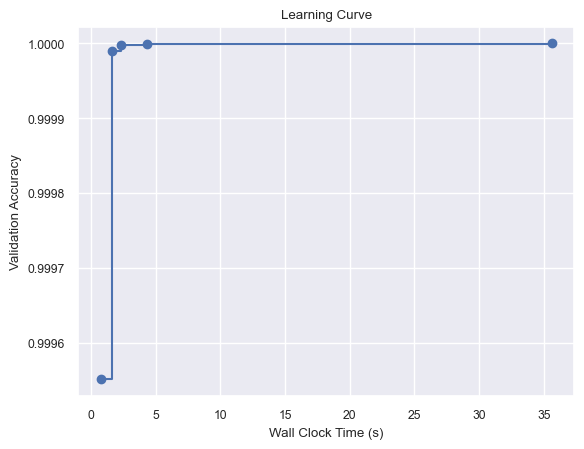

In [73]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

#### We will improve the performance of base model with Cost sensitive neural network

In [83]:
X_train, X_test, y_train, y_test = X_train0, X_test0, y_train0, y_test0

In [84]:
y_train.value_counts()

0    67038
1     6332
Name: hospital_death, dtype: int64

In [90]:
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [92]:
print(len(X.columns))
n_inputs=107

145


### Lets start with a basic neural network

In [93]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(190, input_dim=n_inputs, activation='tanh', kernel_initializer='GlorotNormal'))
model.add(Dropout(0.2)) 
model.add(Dense(100, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2)) 
model.add(Dense(50, input_dim=n_inputs, activation='tanh', kernel_initializer='GlorotNormal'))
model.add(Dropout(0.2)) 
model.add(Dense(10, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2)) 
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
2293/2293 [==============================] - 9s 3ms/step - loss: 0.3131
Epoch 2/10
2293/2293 [==============================] - 7s 3ms/step - loss: 0.2983
Epoch 3/10
2293/2293 [==============================] - 8s 3ms/step - loss: 0.2933
Epoch 4/10
2293/2293 [==============================] - 7s 3ms/step - loss: 0.2900
Epoch 5/10
2293/2293 [==============================] - 7s 3ms/step - loss: 0.2888
Epoch 6/10
2293/2293 [==============================] - 7s 3ms/step - loss: 0.2881
Epoch 7/10
2293/2293 [==============================] - 7s 3ms/step - loss: 0.2872
Epoch 8/10
2293/2293 [==============================] - 7s 3ms/step - loss: 0.2840
Epoch 9/10
2293/2293 [==============================] - 7s 3ms/step - loss: 0.2836
Epoch 10/10
2293/2293 [==============================] - 7s 3ms/step - loss: 0.2823


In [95]:
from sklearn.metrics import roc_auc_score
y_predz=model.predict(X_test)

print(roc_auc_score(y_test,y_predz))

574/574 [==============================] - 1s 2ms/step
0.6823658139811875


In [106]:
y_predz

array([[0.05710587],
       [0.11739507],
       [0.33067325],
       ...,
       [0.05710587],
       [0.10073835],
       [0.12462241]], dtype=float32)

In [113]:
y_predz1 = [1 if i >= 0.1 else 0 for i in y_predz]

In [114]:
print(classification_report(y_test.to_numpy(), y_predz1, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     16760
           1       0.15      0.57      0.24      1583

    accuracy                           0.70     18343
   macro avg       0.55      0.64      0.53     18343
weighted avg       0.88      0.70      0.76     18343



In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
confusion_matrix(y_test.to_numpy(), y_predz1)

array([[11857,  4903],
       [  688,   895]], dtype=int64)

In [121]:
y_train.value_counts()

0    67038
1     6332
Name: hospital_death, dtype: int64

### Lets test  a cost sensitive  neural network

In [122]:
weights_assigned={0:1,1:20}

In [123]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(190, input_dim=n_inputs, activation='tanh', kernel_initializer='GlorotNormal'))
model.add(Dropout(0.2)) 
model.add(Dense(100, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2)) 
model.add(Dense(50, input_dim=n_inputs, activation='tanh', kernel_initializer='GlorotNormal'))
model.add(Dropout(0.2)) 
model.add(Dense(10, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2)) 
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

Epoch 1/10
2293/2293 [==============================] - 9s 3ms/step - loss: 1.7129
Epoch 2/10
2293/2293 [==============================] - 7s 3ms/step - loss: 1.6871
Epoch 3/10
2293/2293 [==============================] - 7s 3ms/step - loss: 1.6789
Epoch 4/10
2293/2293 [==============================] - 7s 3ms/step - loss: 1.6686
Epoch 5/10
2293/2293 [==============================] - 7s 3ms/step - loss: 1.6490
Epoch 6/10
2293/2293 [==============================] - 7s 3ms/step - loss: 1.6533
Epoch 7/10
2293/2293 [==============================] - 7s 3ms/step - loss: 1.6421
Epoch 8/10
2293/2293 [==============================] - 7s 3ms/step - loss: 1.6213
Epoch 9/10
2293/2293 [==============================] - 8s 3ms/step - loss: 1.6353
Epoch 10/10
2293/2293 [==============================] - 7s 3ms/step - loss: 1.6482


In [124]:
from sklearn.metrics import roc_auc_score
y_predz=model.predict(X_test)

print(roc_auc_score(y_test,y_predz))

574/574 [==============================] - 1s 2ms/step
0.5973948666997347


In [134]:
y_predz1 = [1 if i >= 0.65 else 0 for i in y_predz]

In [135]:
print(classification_report(y_test.to_numpy(), y_predz1, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     16760
           1       0.33      0.19      0.24      1583

    accuracy                           0.90     18343
   macro avg       0.63      0.58      0.59     18343
weighted avg       0.87      0.90      0.88     18343



In [136]:
confusion_matrix(y_test.to_numpy(), y_predz1)

array([[16163,   597],
       [ 1288,   295]], dtype=int64)